In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Life Cycle of Model

1- Data Analysis

2- Feature Engineering

3- Feature Selection

4- Model Building 

5- Model Deployment

In [2]:
df_1 = pd.read_csv('1- Raw Data/train.csv')
df_2 = pd.read_csv('1- Raw Data/test.csv')

In [3]:
Depen = df_1['SalePrice']
df3 = df_1.drop(['SalePrice'],axis = 1)

In [4]:
df = pd.concat([df3,df_2],axis = 0)

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### Data Analysis

1- Missing values

2- All the numerical variable

3- Distribution of numerical variable

4- Categorical variable

5- Cardibality of Categorical variable

6- Outliers

7- Relationship between dependent and independent features

### Missing Values

In [6]:
Qty_null_features = [values for values in df.columns if df[values].isnull().sum()>0]
print(len(Qty_null_features))

34


In [7]:
nan = pd.DataFrame(df.isna().sum(),columns = ['Nan_Sum'])
nan['Feature']=nan.index
nan['percentage'] = np.round((df.isna().mean()*100),2)
nan = nan.sort_values(by = ['percentage'])
nan = nan[nan['Nan_Sum']>0]
nan['Decision'] = np.where(nan['percentage']>20,'Discard','Keep')
nan['DataType'] = df.dtypes
nan

Nan_Sum       Feature  percentage Decision DataType
GarageCars          1    GarageCars        0.03     Keep  float64
GarageArea          1    GarageArea        0.03     Keep  float64
KitchenQual         1   KitchenQual        0.03     Keep   object
Electrical          1    Electrical        0.03     Keep   object
SaleType            1      SaleType        0.03     Keep   object
TotalBsmtSF         1   TotalBsmtSF        0.03     Keep  float64
BsmtUnfSF           1     BsmtUnfSF        0.03     Keep  float64
BsmtFinSF2          1    BsmtFinSF2        0.03     Keep  float64
Exterior2nd         1   Exterior2nd        0.03     Keep   object
Exterior1st         1   Exterior1st        0.03     Keep   object
BsmtFinSF1          1    BsmtFinSF1        0.03     Keep  float64
BsmtFullBath        2  BsmtFullBath        0.07     Keep  float64
Functional          2    Functional        0.07     Keep   object
Utilities           2     Utilities        0.07     Keep   object
BsmtHalfBath        2  BsmtHalfBath        0.07     Keep  float64
MSZoning            4      MSZoning        0.14     Keep   object
MasVnrArea         23    MasVnrArea        0.79     Keep  float64
MasVnrType         24    MasVnrType        0.82     Keep   object
BsmtFinType1       79  BsmtFinType1        2.71     Keep   object
BsmtFinType2       80  BsmtFinType2        2.74     Keep   object
BsmtQual           81      BsmtQual        2.77     Keep   object
BsmtExposure       82  BsmtExposure        2.81     Keep   object
BsmtCond           82      BsmtCond        2.81     Keep   object
GarageType        157    GarageType        5.38     Keep   object
GarageFinish      159  GarageFinish        5.45     Keep   object
GarageYrBlt       159   GarageYrBlt        5.45     Keep  float64
GarageQual        159    GarageQual        5.45     Keep   object
GarageCond        159    GarageCond        5.45     Keep   object
LotFrontage       486   LotFrontage       16.65     Keep  float64
FireplaceQu      1420   FireplaceQu       48.65  Discard   object
Fence            2348         Fence       80.44  Discard   object
Alley            2721         Alley       93.22  Discard   object
MiscFeature      2814   MiscFeature       96.40  Discard   object
PoolQC           2909        PoolQC       99.66  Discard   object

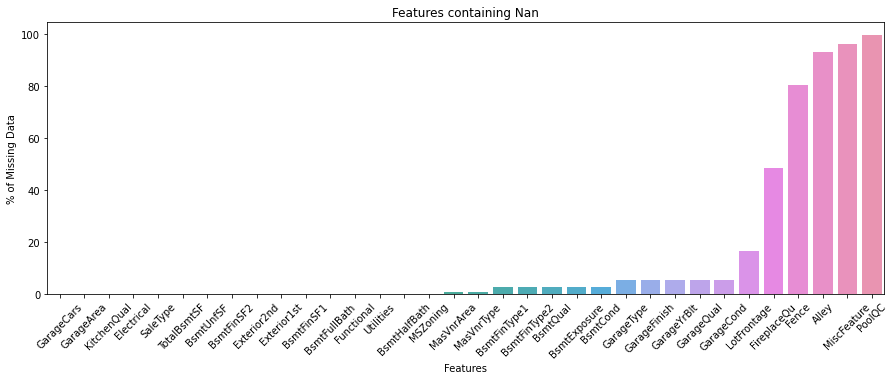

In [8]:
plt.figure(figsize = (15,5))
sns.barplot(x = nan['Feature'], y = nan['percentage'])
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

<AxesSubplot:>

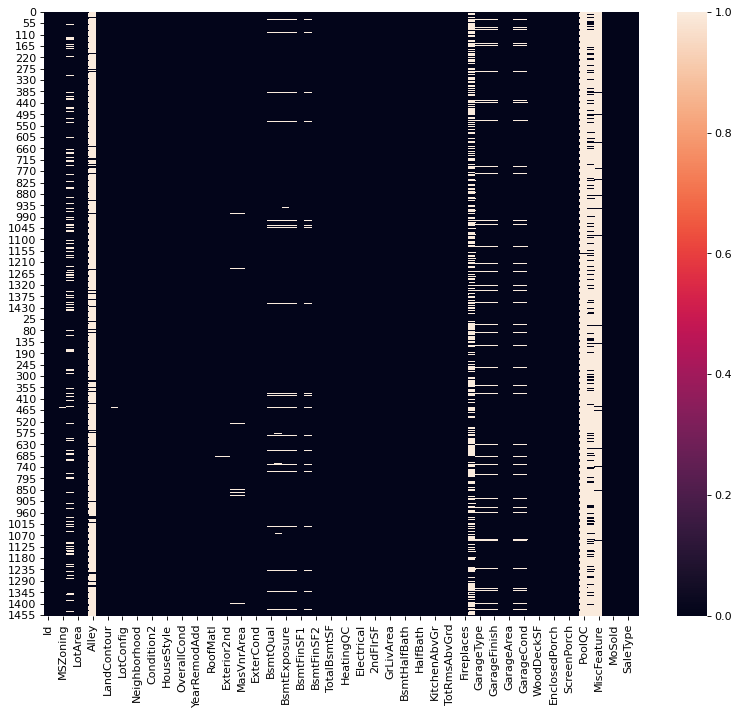

In [9]:
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(df.isnull())

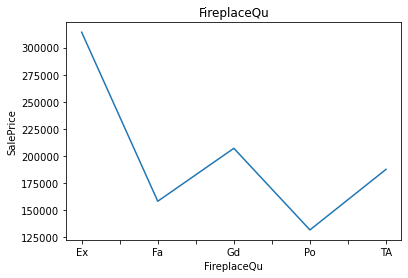

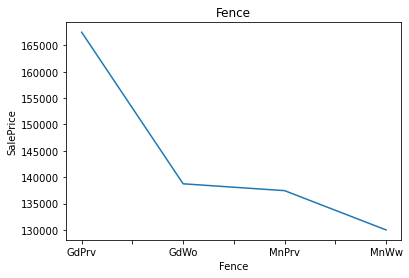

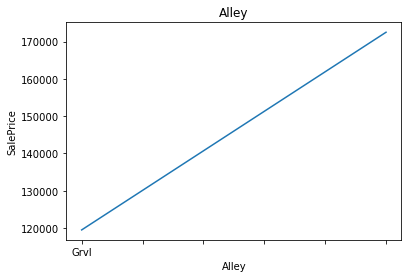

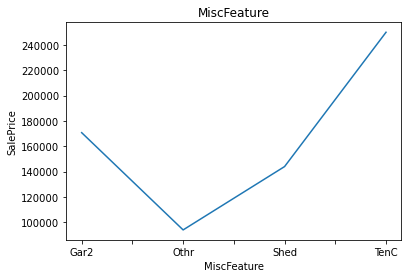

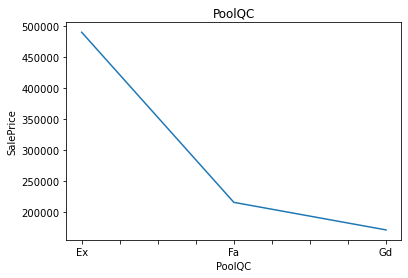

In [10]:
high_nan= ['FireplaceQu','Fence','Alley','MiscFeature','PoolQC']
for i in high_nan:
    data = df_1.copy()
    np.where(data[i].isna()>0,'None',data[i])
    data.groupby(i)['SalePrice'].median().plot()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()

# Correlation

In [11]:
(df_1.corr('pearson')**2)['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePr

<AxesSubplot:>

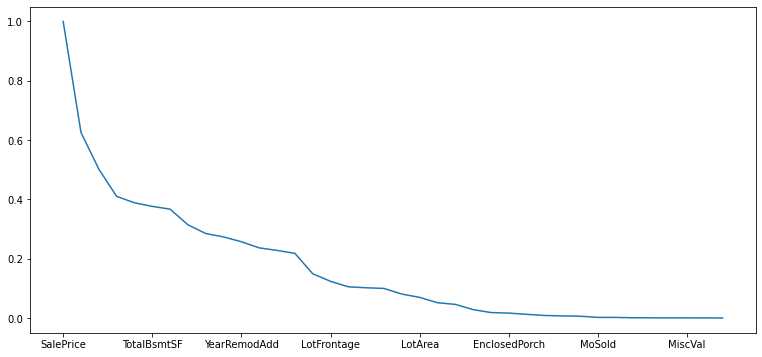

In [12]:
plt.figure(figsize=(13,6))
(df_1.corr()**2)['SalePrice'].sort_values(ascending = False).plot()

<AxesSubplot:xlabel='SalePrice'>

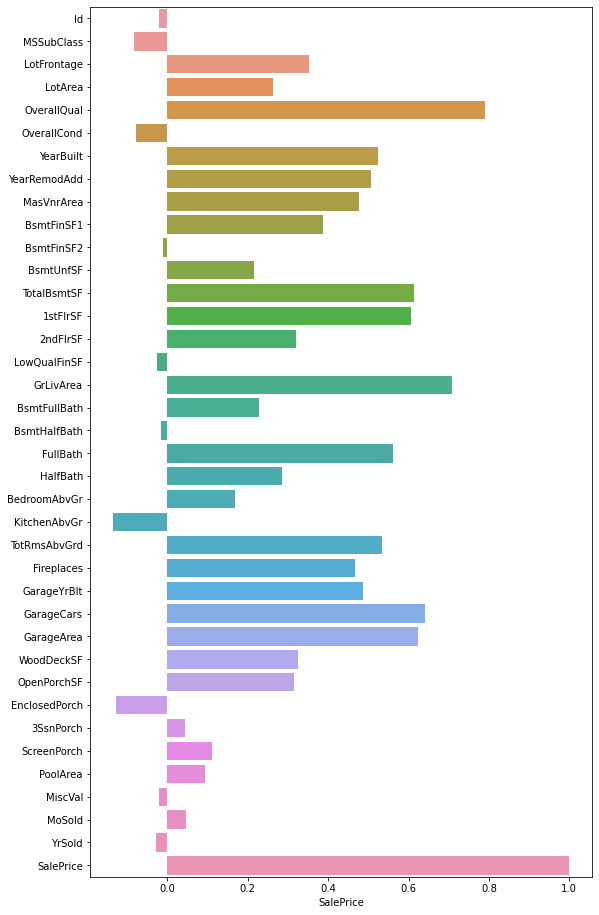

In [13]:
plt.figure(figsize=(9,16))
sns.barplot(x=df_1.corr()['SalePrice'],y=df_1.corr()['SalePrice'].index,orient='h')

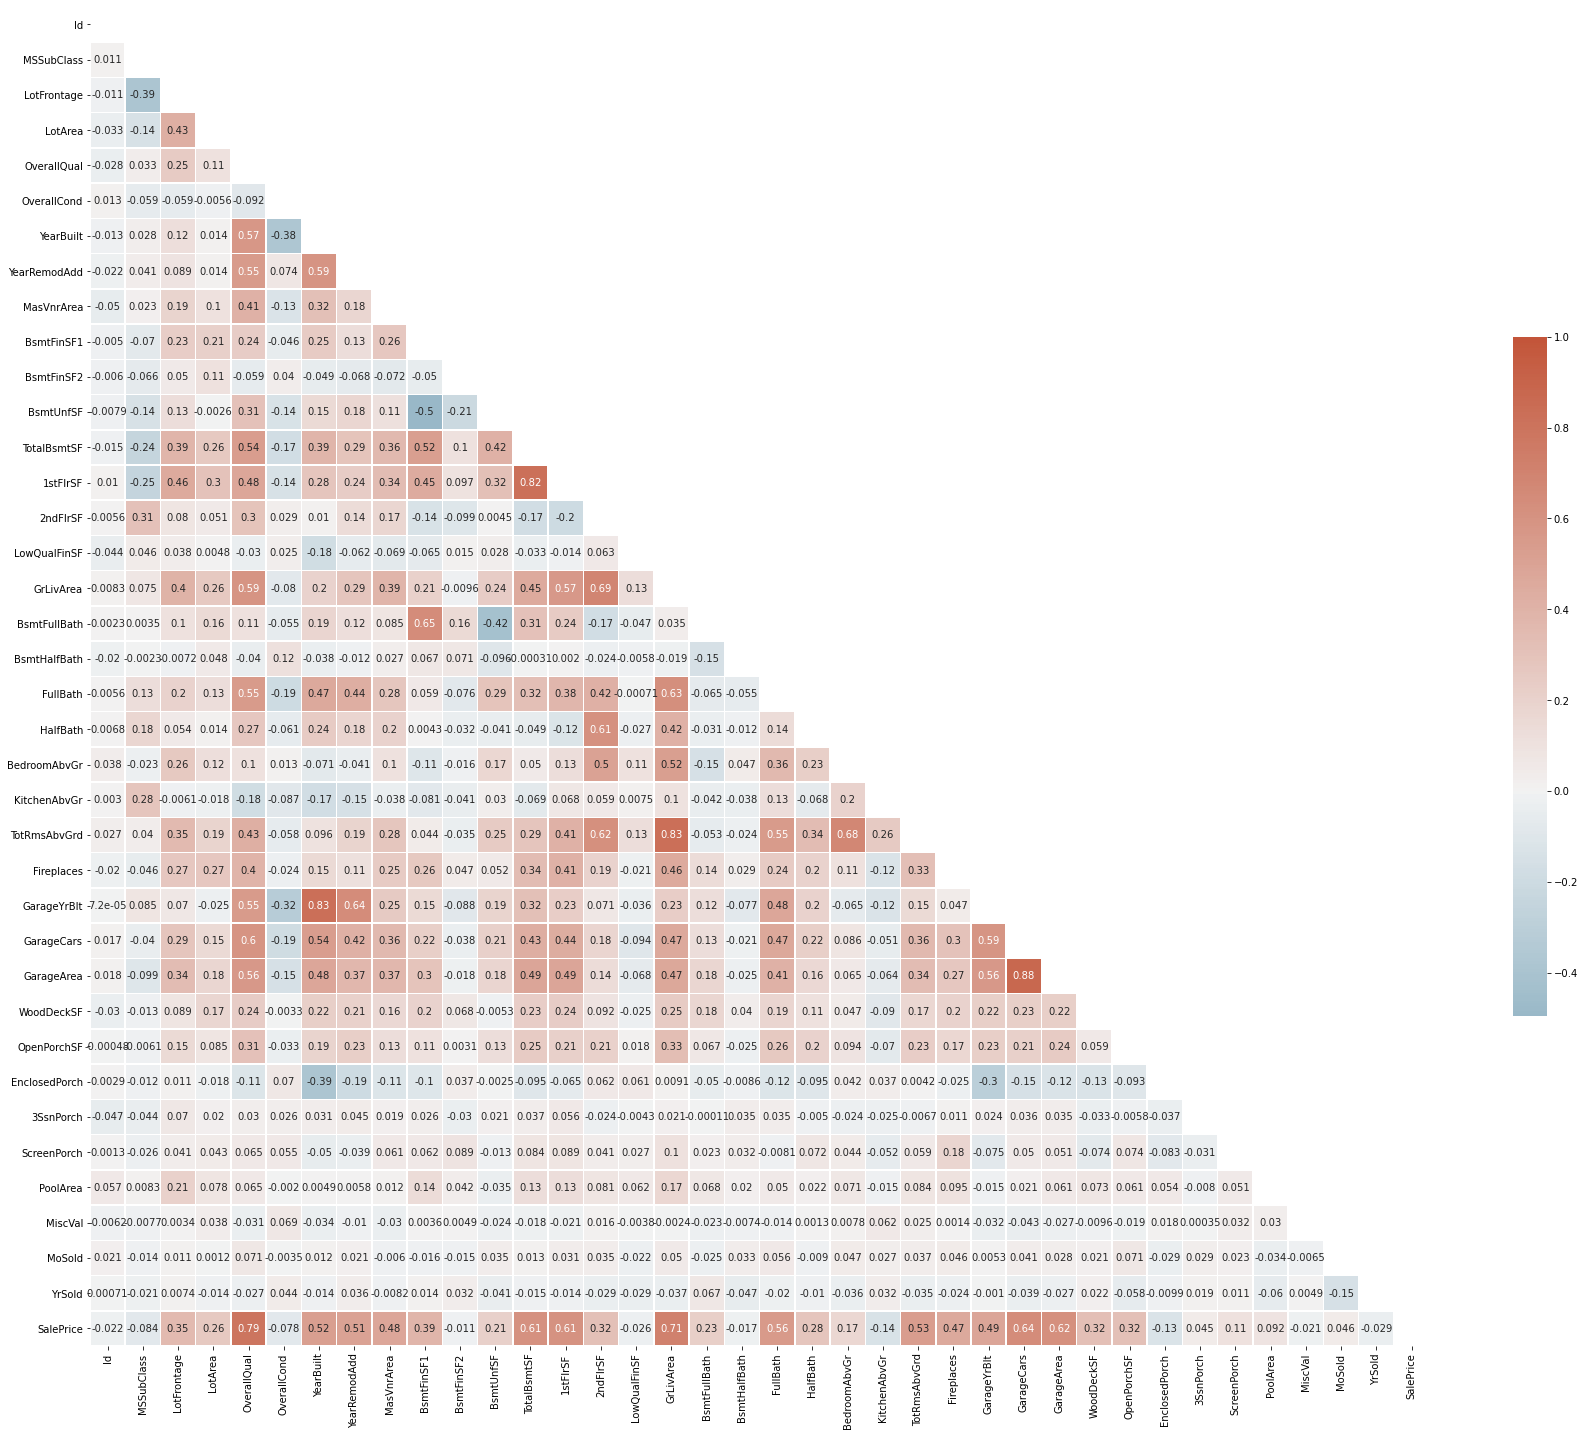

In [14]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df_1.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap,vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

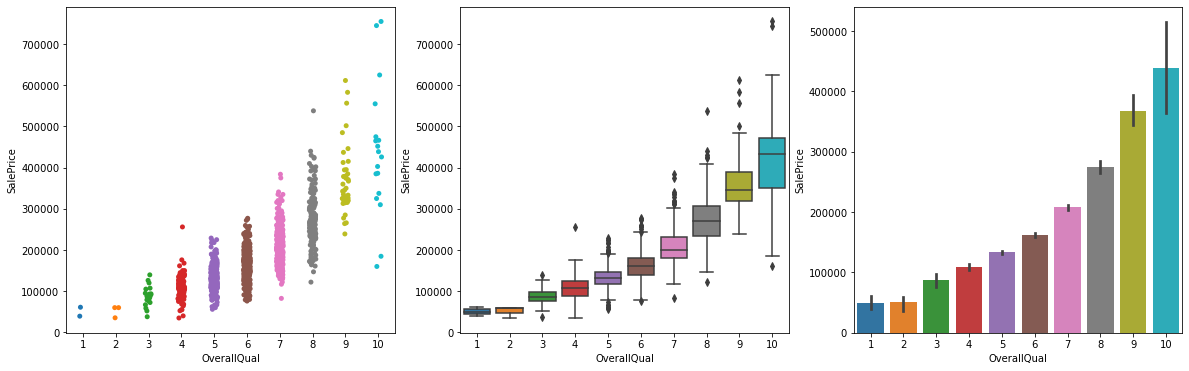

In [15]:
figure, ax = plt.subplots(1,3, figsize = (20,6))
sns.stripplot(data=df_1, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.boxplot(data=df_1, x = 'OverallQual', y='SalePrice', ax = ax[1])
sns.barplot(x='OverallQual', y='SalePrice',data=df_1)
plt.show()

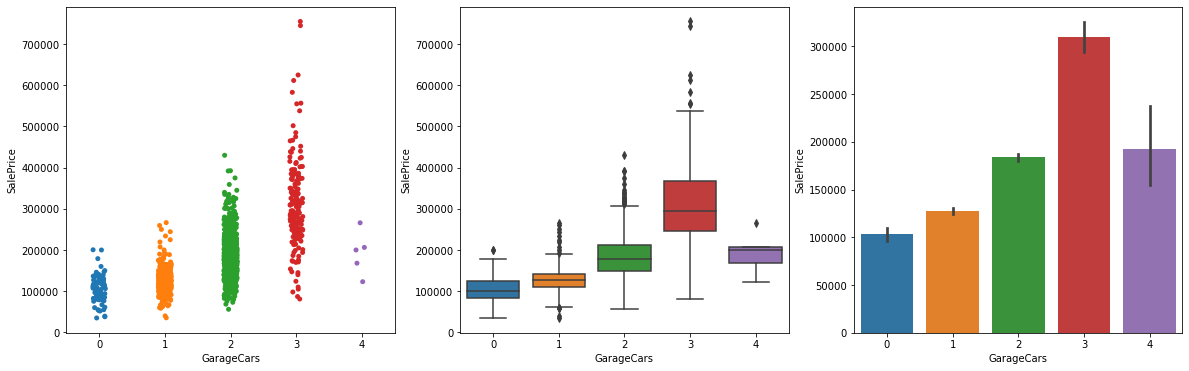

In [16]:
figure, ax = plt.subplots(1,3, figsize = (20,6))
sns.stripplot(data=df_1, x = 'GarageCars', y='SalePrice', ax = ax[0])
sns.boxplot(data=df_1, x = 'GarageCars', y='SalePrice', ax = ax[1])
sns.barplot(x='GarageCars', y='SalePrice',data=df_1)
plt.show()

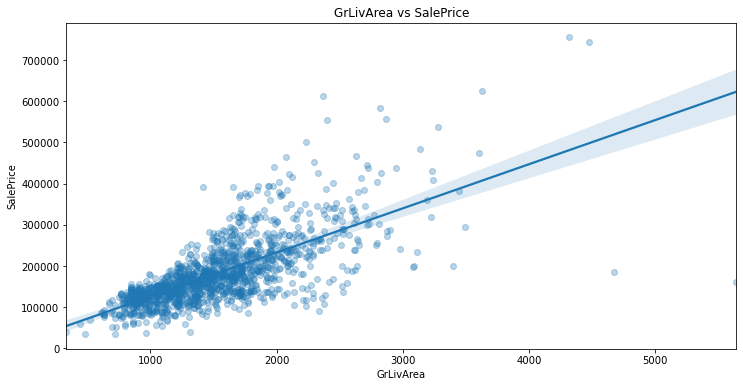

In [17]:
plt.figure(figsize = (12,6))
sns.regplot(data=df_1, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.3})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.show()

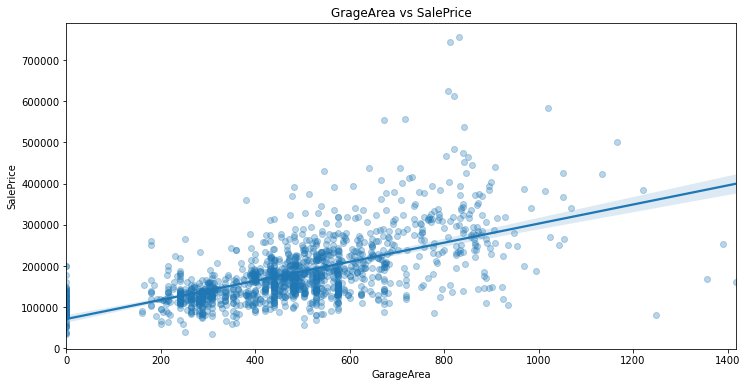

In [18]:
plt.figure(figsize = (12,6))
sns.regplot(data=df_1, x = 'GarageArea', y='SalePrice', scatter_kws={'alpha':0.3})
plt.title('GrageArea vs SalePrice', fontsize = 12)
plt.show()

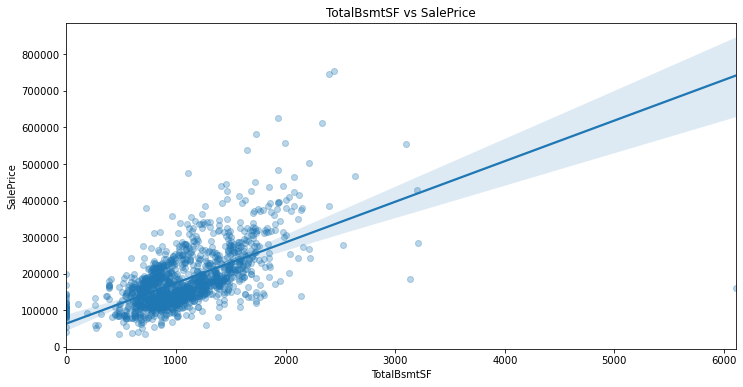

In [19]:
plt.figure(figsize = (12,6))
sns.regplot(data=df_1, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.3})
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


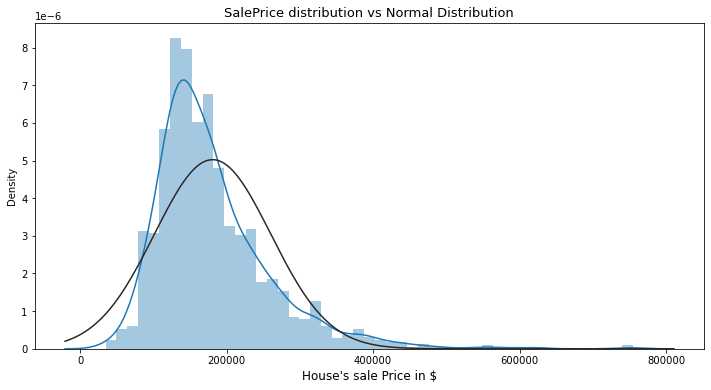

In [20]:
from scipy.stats import norm
(mu, sigma) = norm.fit(df_1['SalePrice'])
plt.figure(figsize = (12,6))
sns.distplot(df_1['SalePrice'], kde = True, hist=True,fit = norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.show()

# Handling Missing Values

In [21]:
nan_object = [values for values in Qty_null_features if df[values].dtypes == 'O']

In [22]:
#Categorical
data = df.copy()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy = 'most_frequent')
data[nan_object] = pd.DataFrame(imputer.fit_transform(data[nan_object]))

In [23]:
#Numerical
non_object = [values for values in data.columns if data[values].isnull().sum()>0]
imputer = SimpleImputer(missing_values=np.nan,strategy = 'mean')
data[non_object] = pd.DataFrame(imputer.fit_transform(data[non_object]))

# Encoding and Converting Categorical Features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

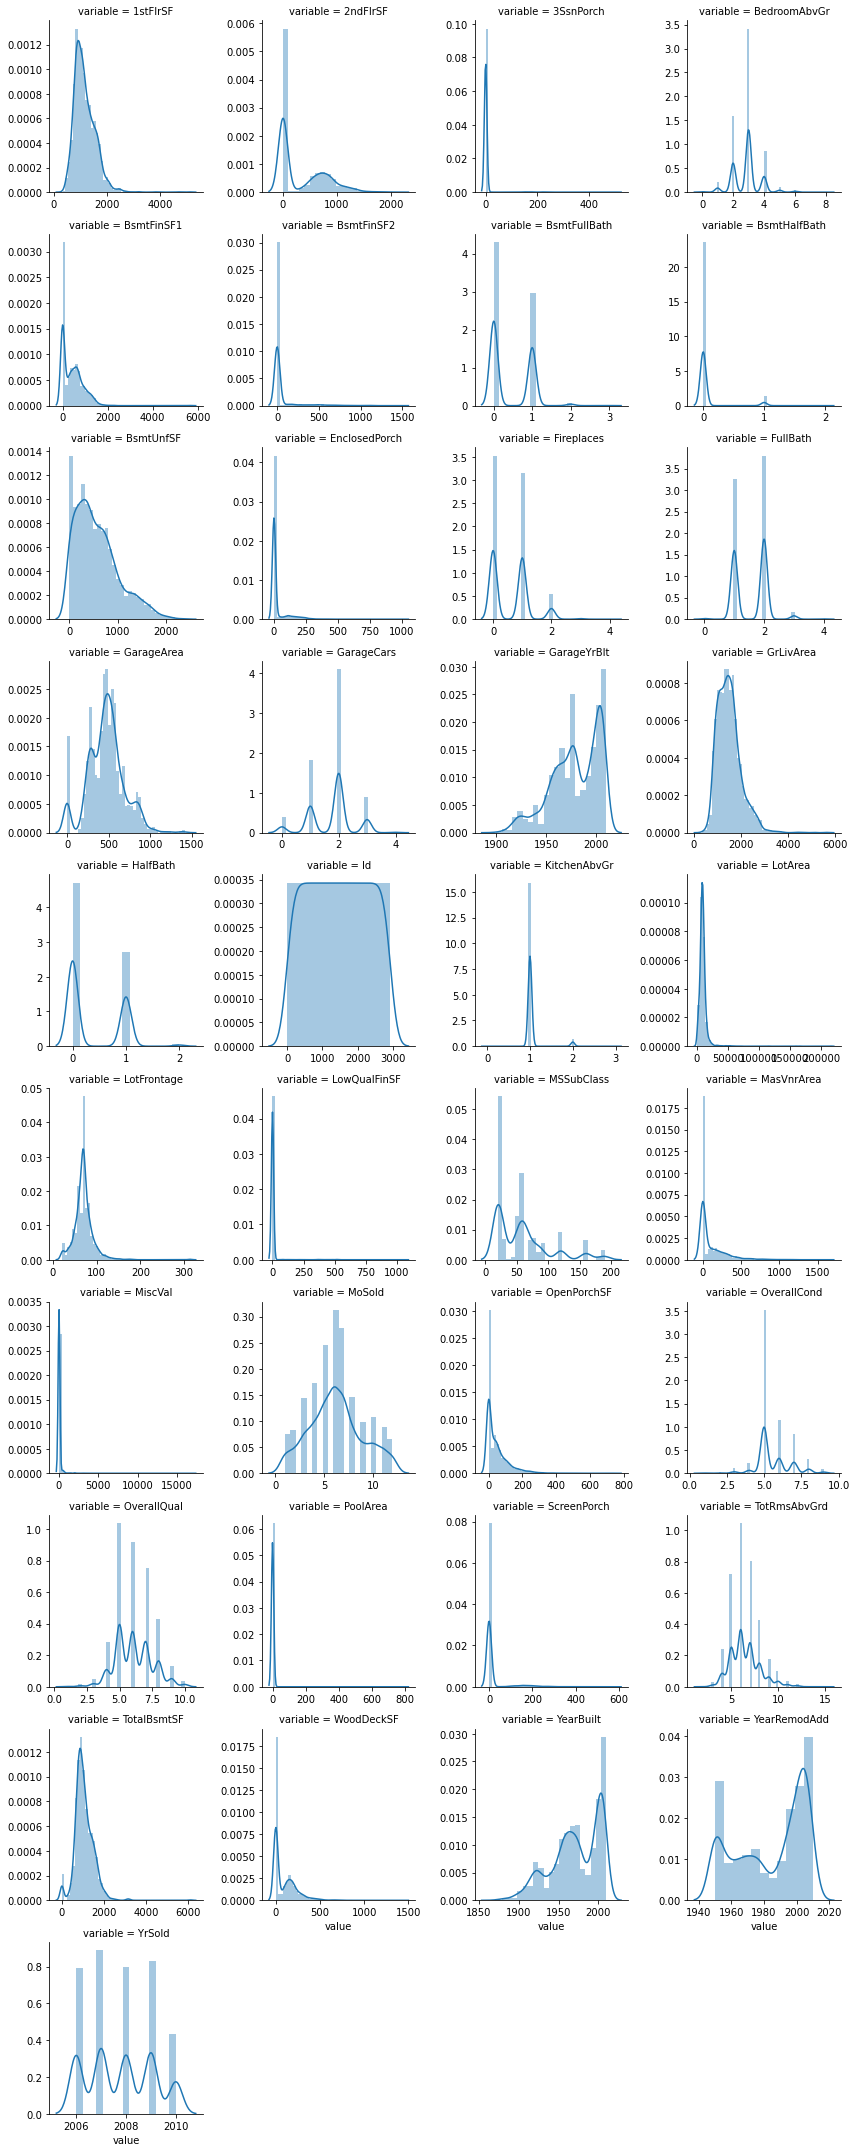

In [24]:
#to check how many numerical features serve as categorical feature then we convert into astype('str')
numeric = df.select_dtypes(include=[np.number])
f = pd.melt(data,value_vars=sorted(numeric))
g = sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
g = g.map(sns.distplot,'value')
plt.show()

In [25]:
str_feature = ['GarageYrBlt','MSSubClass','MoSold','OverallCond','OverallQual','YearRemodAdd','YrSold','YearBuilt']
for i in str_feature:
    data[i] = data[i].astype(str)

In [26]:
label_encoding =['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Fence']

In [27]:
#label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data[label_encoding] = data[label_encoding].apply(le.fit_transform) 

In [28]:
#One Hot Encoding
#cat = data.select_dtypes(exclude=[np.number])
cat_features = [i for i in data.columns if data[i].dtypes =='O']
data_encoded = pd.get_dummies(data[cat_features])

In [29]:
#concat onehot encode data and labeled data
data_drop = data.drop(cat_features,axis="columns")
data_model = pd.concat([data_drop,data_encoded],axis=1)

# Numerical Variable Log

In [30]:
#log = ['LotFrontage','LotArea','1stFlrSF','GrLivArea']

In [31]:
train_D = data_model.copy()
for i in train_D.columns:
    if 0 in train_D[i].unique():
        pass
    else:
        train_D[i] = np.log(train_D[i])

In [32]:
train_D.drop('Id',axis = 'columns',inplace = True)

In [33]:
train_D.shape

(2919, 558)

# Standard Scaler and Log

In [34]:
# Apply Standard Scaler
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
xx = s.fit_transform(train_D)

In [35]:
sc_lasso = pd.DataFrame(s.fit_transform(train_D),columns = train_D.columns)

In [36]:
y  = np.log(Depen)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

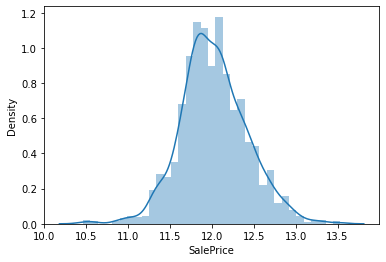

In [37]:
sns.distplot(y)

### PCA (Principle component Analysis) 
is dimensionality reduction technique that enable you to indentiy correlation (here correlation means covariance between two variable) and patterns in a datasets so that it can be transformed into a significantly lower dimension data without loss of any information

*PCA compress the information of varialbe*

*There are 5 steps of calculating PCA
 1) Standardize the data
    
 2) Compute the covariance

 3) Compute eigen value and eigen vector
    
 4) Compute PCA

 5) Reduce the dimension

# PCA Analysis

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=250)
X_feat = pca.fit_transform(xx)
explained = pca.explained_variance_ratio_

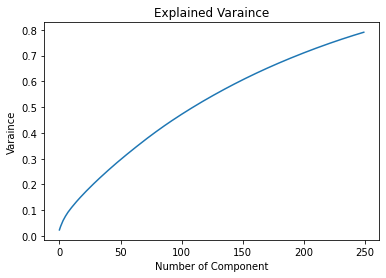

In [39]:
plt.figure()
plt.plot(np.cumsum(explained))
plt.xlabel('Number of Component')
plt.ylabel('Varaince')
plt.title('Explained Varaince')
plt.show()

In [40]:
pca_com = 250
Var_matrix =(pd.concat([pd.DataFrame(list(train_D.columns), columns=["Factors"]) ,pd.DataFrame(list(explained**2), columns=["^2 Variance"] )] , axis=1).sort_values(by='^2 Variance', ascending = False)[0:pca_com])

list(Var_matrix['Factors']) 
X_new = train_D[list(Var_matrix['Factors'])]

len(X_new)

2919

In [41]:
train = X_new.iloc[0:1460]
test = X_new.iloc[1460:]

In [42]:
print('train:',train.shape)
print('test:',test.shape)

train: (1460, 250)
test: (1459, 250)


In [43]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.3,random_state=0)

# Lasso Feature Selection

In [44]:
train_lasso = sc_lasso.iloc[0:1460]
test_lasso = sc_lasso.iloc[1460:]

In [45]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_selection = SelectFromModel(Lasso(alpha = 0.008,random_state = 0))
feature_selection.fit(train_lasso,y)

SelectFromModel(estimator=Lasso(alpha=0.008, random_state=0))

In [46]:
len(feature_selection.get_support())

558

In [47]:
Lasso_X = train_lasso.columns[(feature_selection.get_support())]
print(len(Lasso_X))

81


In [48]:
Lasso_X = train_lasso[Lasso_X]

In [49]:
Lasso_X.columns

Index(['LotArea', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'GarageCars', 'GarageArea',
       'GarageCond', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass_30',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RM', 'LandContour_Bnk',
       'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition1_Artery', 'Condition1_Norm',
       'Condition2_PosN', 'OverallQual_1', 'OverallQual_10', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallCond_3', 'OverallCond_4', 'OverallCond_7',
       'OverallCond_

# Cross Validation:
### Reason:

When data is being split in two part train and test with random state, their result might change when split changes so to over accuracy of model k fold is used 

##### K Fold CV:
Folds is being developed then in each fold some proportion of test and train data is selected the accuracy is calculated of each fold.
issues: Imbalancement can occur in k fold cv mehtod

##### Stratified CV:

Mentioned above problem resolved by stratified techniuque it select mashed instances in train and test fold

# Ridge Resgression

F(X) = (y-y^)+lambda(slope)^2

In [50]:
#Ridge Regression from PCA
import sklearn.linear_model as linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
skfold=StratifiedKFold(n_splits=10)
model=linear_model.Ridge(alpha = 500)
#scores=cross_val_score(model,X_model,Y_model.astype(int),cv=skfold,scoring='neg_mean_squared_error') calculate only single score with command
scores=cross_validate(model,train,y.astype(int),cv=skfold,scoring=('neg_mean_squared_error','r2','neg_root_mean_squared_error','neg_mean_squared_log_error'))
print('Mean Absolute Error:',scores['test_neg_mean_squared_error'].mean())
print('R square:',scores['test_r2'].mean())
print('Root Mean Square Error:',scores['test_neg_root_mean_squared_error'].mean())
Ridge_pred = cross_val_predict(model,train,y, cv=4)

Mean Absolute Error: -0.10314103266806085
R square: 0.6395871027827063
Root Mean Square Error: -0.3194190225093486


In [51]:
#Ridge Regression From Lasso
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
skfold=StratifiedKFold(n_splits=10)
model=linear_model.Ridge(alpha = 500)
#scores=cross_val_score(model,X_model,Y_model.astype(int),cv=skfold,scoring='neg_mean_squared_error') calculate only single score with command
scores=cross_validate(model,train_lasso,y.astype(int),cv=skfold,scoring=('neg_mean_squared_error','r2','neg_root_mean_squared_error','neg_mean_squared_log_error'))
print('Mean Absolute Error:',scores['test_neg_mean_squared_error'].mean())
print('R square:',scores['test_r2'].mean())
print('Root Mean Square Error:',scores['test_neg_root_mean_squared_error'].mean())
Ridge_pred_lasso = cross_val_predict(model,train_lasso,y, cv=4)

Mean Absolute Error: -0.09321309174189343
R square: 0.6742484546552994
Root Mean Square Error: -0.3039140589780862


# Support Vector Machine
The purpose SVM to convert low dimension to high dimension
#### Formula
w(transpose)x + b =-1 for above plane
w(transpose)x + b =1 for lower plane

##### Cost Function
(w,b) = min w/2 +c +sigma zeta
Where w is slope
b = distance origin to x where linear cut
c = how many error are acceptable in hyperplane (regularization is required to make model generalize)
zeta = summation of value of error
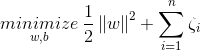
##### Terminologies and concept:
<li>Hard Margin: properly classify points there is no regularization include in equation (w,b) = min w/2</li>
<li>Soft Margin: Include some margin of error in classification include regularization</li>
<blockquote>Question: How to overfit model in non linearly seperable dataset using a hard margin <br></blockquote>
Answer: when there is a hard margin in svm means there is no regularization, so to overfit model, rbf kernal is used for non linear seperable dataset. The rbf (radial basis function) kernel equation i s exp (x2-x1)^2/2sigma^2 i.e 1/2sigma^2 is gamma
if gamma value is decreased = model overfit
if gamma value in increased = model underfit

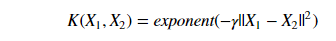

Parameters:
<li>C: Inverse of the strength of regularization.</li>
Behavior: As the value of ‘c’ increases the model gets overfits.
As the value of ‘c’ decreases the model underfits.
<li>2. γ : Gamma (used only for RBF kernel)</li>
Behavior: As the value of ‘ γ’ increases the model gets overfits.
As the value of ‘ γ’ decreases the model underfits.

###### Polynomial kernel:
 (a.b+r)^d if we consider r = 0 no matter what the dot product will leave the data on original posistion on any values of d
 now if ab+a^2.b^2....a^2.b^2 means add polynomial kernal with increasing d values also result increasing dimensions to the values of additions of kernal

###### Radial Kernel RBF (Radial Basis Function):
RBF works in infinite dimension
RBF behave like a weighted nearest neighbor model means nearest neighbor have a lot influence on closet observation while away observation less influence on classification

###### In SVM both depdent and independet varaible need to standard scaler

In [52]:
#SVM Regression from PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
skfold=StratifiedKFold(n_splits=10)
model=SVR(kernel = 'rbf')
#scores=cross_val_score(model,X_model,Y_model.astype(int),cv=skfold,scoring='neg_mean_squared_error') calculate only single score with command
scores=cross_validate(model,train,y.astype(int),cv=skfold,scoring=('neg_mean_squared_error','r2','neg_root_mean_squared_error','neg_mean_squared_log_error'))
print('Mean Absolute Error:',scores['test_neg_mean_squared_error'].mean())
print('R square:',scores['test_r2'].mean())
print('Root Mean Square Error:',scores['test_neg_root_mean_squared_error'].mean())
SVM_pred = cross_val_predict(model,train,y, cv=4)

Mean Absolute Error: -0.13001596928815712
R square: 0.5455663232055838
Root Mean Square Error: -0.359543615681552


In [53]:
#SVM Regression From Lasso
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
skfold=StratifiedKFold(n_splits=10)
model=SVR(kernel = 'rbf')
#scores=cross_val_score(model,X_model,Y_model.astype(int),cv=skfold,scoring='neg_mean_squared_error') calculate only single score with command
scores=cross_validate(model,train_lasso,y.astype(int),cv=skfold,scoring=('neg_mean_squared_error','r2','neg_root_mean_squared_error','neg_mean_squared_log_error'))
print('Mean Absolute Error:',scores['test_neg_mean_squared_error'].mean())
print('R square:',scores['test_r2'].mean())
print('Root Mean Square Error:',scores['test_neg_root_mean_squared_error'].mean())
SVM_pred_lasso = cross_val_predict(model,train_lasso,y, cv=4)

Mean Absolute Error: -0.10195205846054742
R square: 0.6432425921716336
Root Mean Square Error: -0.3186276066530603


# Ensemble Learning
    Ensemble means combine, it includes 2 methods
<li>Bagging: 1) Random Forest</li>
<li>Boosting: 1) ADABoost 2) Gradient boosting 3) XGboost</li>

## What is Bagging and Random Forest:
<br>
<li>Bagging is also called bootstrap aggregation. To understand bagging consider a vertical layer holding a dataset then in the second vertical layer there are many base learner, from first layer some sample pass to the each base learner (sample is based on replacement) then each base learner give output, combining output of all base learner give final result and combinig process called aggregation and row sampling method is called boosting   </li>
<li>Random forest include many decision tree inplace of base learner</li>
<li>Sampled rows and Sampled features is transfered to DT from dataset</li>


##### In Ensemble learning data not need to be normalized or standardized

In [54]:
#Random Forest Regression From PCA
from sklearn.ensemble import RandomForestRegressor
skfold=StratifiedKFold(n_splits=5)
model=RandomForestRegressor(n_estimators = 20, random_state = 0)
#scores=cross_val_score(model,X_model,Y_model.astype(int),cv=skfold,scoring='neg_mean_squared_error') calculate only single score with command
scores=cross_validate(model,train,y.astype(int),cv=skfold,scoring=('neg_mean_squared_error','r2','neg_root_mean_squared_error','neg_mean_squared_log_error'))
print('Mean Absolute Error:',scores['test_neg_mean_squared_error'].mean())
print('R square:',scores['test_r2'].mean())
print('Root Mean Square Error:',scores['test_neg_root_mean_squared_error'].mean())
RF_pred_pca = cross_val_predict(model,train,y, cv=4)

Mean Absolute Error: -0.07968150684931505
R square: 0.7210306818402501
Root Mean Square Error: -0.28189698782916633


In [55]:
#Random Forest Regression From Lasso
from sklearn.ensemble import RandomForestRegressor
skfold=StratifiedKFold(n_splits=5)
model=RandomForestRegressor(n_estimators = 20, random_state = 0)
#scores=cross_val_score(model,X_model,Y_model.astype(int),cv=skfold,scoring='neg_mean_squared_error') calculate only single score with command
scores=cross_validate(model,train_lasso,y.astype(int),cv=skfold,scoring=('neg_mean_squared_error','r2','neg_root_mean_squared_error','neg_mean_squared_log_error'))
print('Mean Absolute Error:',scores['test_neg_mean_squared_error'].mean())
print('R square:',scores['test_r2'].mean())
print('Root Mean Square Error:',scores['test_neg_root_mean_squared_error'].mean())
RF_pred_lasso = cross_val_predict(model,train_lasso,y, cv=4)

Mean Absolute Error: -0.08082876712328768
R square: 0.7170024352824657
Root Mean Square Error: -0.284026144114272


## XGBoost Regressor in depth intuition:
<li>First step: Base model is calculated by taking the average of dependent feature</li>
<li>Second step: residual is calculated by subtracting the dependent feature observation by base model average</li>
<li>Third step: based on 1st independent feature decision tree created and on tree branches residuals would assigned</li>
<li>Fourth step: on branches of tree similarity weight will be calculated</li>
<blockquote>Similarity Weight = Sum of residuals / Number of residuals + lambda</blockquote>
<li>Fifth step: Similarity weight of root node and leaf node will be calculated</li>
<li>sixth step: Gain will then calculated</li>
<blockquote>Gain = Sum of Similarity weight of leaf node - Subtract from root node</blockquote>
<li>seventh step: then calculate gain w.r.t the each observation of 1st dependent feature and select that observation for split which has high gain</li>
<li>Eight Step:After selecting higher gain node of first feature, select second feature for second branch of tree </li>
<li>Ninth Step:then pass the observation from tree, then calculate output</li>
<blockquote>output = base model + alpha (alpha is learning rate)[T:Average of lead mode]+ alpha x T + alpha n x Tn</blockquote>
<li>Tenth Step:set gamma value usually use default value, the purpose is to prone tree node when value of GAIN is less than the value of GAMMA then tree will be removed. It is also called post proning technique used when model is overfitted</li>

##### HyperParameter Tunning:

<li>gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.</li>
<li>alpha: L1 regularization on leaf weights. A large value leads to more regularization.</li>
<li>lambda: L2 regularization on leaf weights and is smoother than L1 regularization.</li>

In [56]:
#XGB Regression From pca
import xgboost as xgb
skfold=StratifiedKFold(n_splits=5)
xgb=xgb.XGBRegressor()
#scores=cross_val_score(model,X_model,Y_model.astype(int),cv=skfold,scoring='neg_mean_squared_error') calculate only single score with command
scores=cross_validate(xgb,train,y.astype(int),cv=skfold,scoring=('neg_mean_squared_error','r2','neg_root_mean_squared_error','neg_mean_squared_log_error'))
print('Mean Absolute Error:',scores['test_neg_mean_squared_error'].mean())
print('R square:',scores['test_r2'].mean())
print('Root Mean Square Error:',scores['test_neg_root_mean_squared_error'].mean())
xgb_pred_pca = cross_val_predict(xgb,train,y, cv=4) 

Mean Absolute Error: -0.08816183248883659
R square: 0.6912070641724825
Root Mean Square Error: -0.29676892111843634


In [57]:
#XGB Regression From Lasso
import xgboost as xgb
skfold=StratifiedKFold(n_splits=5)
xgb=xgb.XGBRegressor(n_estimators = 100,max_depth = 2)
#scores=cross_val_score(model,X_model,Y_model.astype(int),cv=skfold,scoring='neg_mean_squared_error') calculate only single score with command
scores=cross_validate(xgb,train_lasso,y.astype(int),cv=skfold,scoring=('neg_mean_squared_error','r2','neg_root_mean_squared_error','neg_mean_squared_log_error'))
print('Mean Absolute Error:',scores['test_neg_mean_squared_error'].mean())
print('R square:',scores['test_r2'].mean())
print('Root Mean Square Error:',scores['test_neg_root_mean_squared_error'].mean())
xgb_pred_lasso = cross_val_predict(xgb,train_lasso,y, cv=4) 

Mean Absolute Error: -0.08513646978864539
R square: 0.7019370136604904
Root Mean Square Error: -0.2915027665951258


# Gradient Boosting:

<li>Step 1: Initialize the model with constant value: </li>

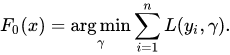

*Where gamma (predicted) means loss function  a differentiable loss function<br>



 number of iterations M.

* y means dependent varaible values<br>
* Summation measn, sum of all y-predicted values<br>
* argmin means to find the minimum value to find the predicted values that minimizes the sum for that differentiate the each sum part with respect to the predicted


<li>Step: 2 For m = 1 to M(M is a loop M= Trees and compute the mentioned below equation</li>

   <blockquote>Part A in Step:2</blockquote>

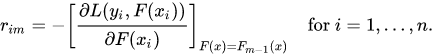

* After Solving the above equation got result (Observed - predicted) Which is residual and calculate the w.r.t each observation

<blockquote>Part B in Step:2</blockquote>

<li>Fit a regression tree to the rim values and create terminal regions Rjm, for J=1...Jm</li>
* Above state is explanning that build tree based on independent varaible to predict residuals
* where j number of leafs in tree and m is the number of tree

<blockquote>Part C in Step:2</blockquote>

<li>For J=1....Jm compute </li>

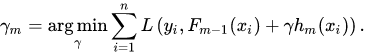

* After development of tree above calculate the output from the tree
* above equation is like when insert loss function gamma = argmin Summation 1/2(y -(fm+gamma))^2
* where fm means previous constant function and gamma is output is residual

<blockquote>Part D in Step:2</blockquote>

<li>update the model</li>



predicted value by tree = first prdicted value + learning rate * residual by tree


<li>Step:3 Output means sum of all previous values</li>

In a Simple Way:
* Calculate the new residuals for the new predictions
* create the new tree
* calculate the output values which is resdual
* Make the new prediction
* after add all previous prediction with new prediction

In [70]:
#Gradient Boosting Regression From pca
from sklearn.ensemble import GradientBoostingRegressor
skfold=StratifiedKFold(n_splits=5)
gbr = GradientBoostingRegressor()
#scores=cross_val_score(model,X_model,Y_model.astype(int),cv=skfold,scoring='neg_mean_squared_error') calculate only single score with command
scores=cross_validate(gbr,train,y.astype(int),cv=skfold,scoring=('neg_mean_squared_error','r2','neg_root_mean_squared_error','neg_mean_squared_log_error'))
print('Mean Absolute Error:',scores['test_neg_mean_squared_error'].mean())
print('R square:',scores['test_r2'].mean())
print('Root Mean Square Error:',scores['test_neg_root_mean_squared_error'].mean())
grb_pred_lasso = cross_val_predict(gbr,train,y, cv=4) 

Mean Absolute Error: -0.07873532485971532
R square: 0.724383096215272
Root Mean Square Error: -0.28035057435934174


In [71]:
#Gradient Boosting Regression From lasso
from sklearn.ensemble import GradientBoostingRegressor
skfold=StratifiedKFold(n_splits=5)
gbr = GradientBoostingRegressor()
#scores=cross_val_score(model,X_model,Y_model.astype(int),cv=skfold,scoring='neg_mean_squared_error') calculate only single score with command
scores=cross_validate(gbr,train_lasso,y.astype(int),cv=skfold,scoring=('neg_mean_squared_error','r2','neg_root_mean_squared_error','neg_mean_squared_log_error'))
print('Mean Absolute Error:',scores['test_neg_mean_squared_error'].mean())
print('R square:',scores['test_r2'].mean())
print('Root Mean Square Error:',scores['test_neg_root_mean_squared_error'].mean())
grb_pred_lasso = cross_val_predict(gbr,train_lasso,y, cv=4) 

Mean Absolute Error: -0.07952636523382846
R square: 0.7216949458683122
Root Mean Square Error: -0.2815235805247999


# CatBoost

In [59]:
#perform with PCA feature, however result were same when perform with lasso and without lasso and pca
from sklearn.model_selection import train_test_split
CX_train, CX_test, cy_train, cy_test = train_test_split(train,y,test_size=0.3,random_state=0)

In [60]:
CX_train.shape

(1022, 250)

In [61]:
# Cat Boost Regressor
from catboost import Pool
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat_model = cat.fit(CX_train,cy_train,
                     eval_set = (CX_test,cy_test),verbose = 0,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
cat_pred = cat_model.predict(CX_test)
cat_score = sqrt(mean_squared_error(cy_test, cat_pred))
r2 = r2_score(cy_test, cat_pred)
print(r2,cat_score)

0.9004433117847459 0.12402667810436607


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


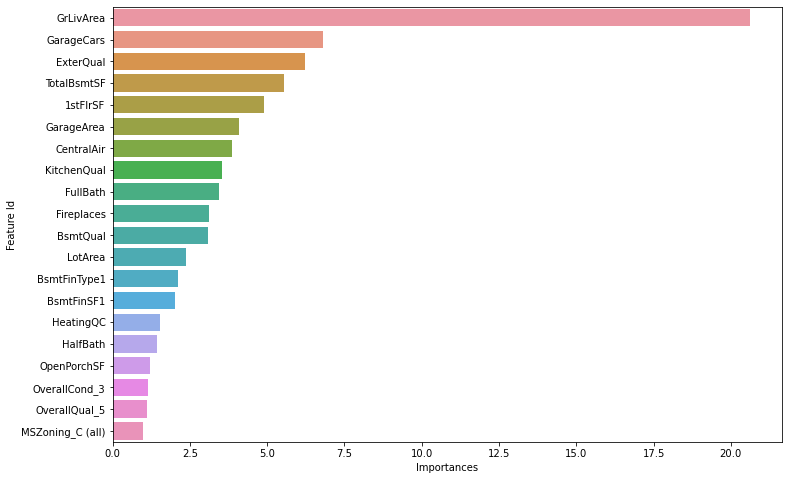

In [63]:
feat_imp = cat_model.get_feature_importance(prettified=True)
plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:20], orient = 'h')
plt.show()

# Submission 

In [73]:
gbr.fit(train,y.astype(int))
test_pred = pd.DataFrame(np.round(np.expm1(gbr.predict(test)),1),columns = ['SalePrice'])

In [75]:
test_id = df_2.iloc[:,0:1]

In [76]:
prediction = pd.concat([test_id,test_pred],axis = 1)

In [77]:
prediction.to_csv("result_2.csv", index = False, header = True)

In [68]:
import pickle
pickle.dump(cat_model,open('prediction.csv','wb'))
model_launch = pickle.load(open('prediction.csv','rb'))
r2_score(cy_test, model_launch.predict(CX_test))

0.9004433117847459